In [37]:
with open("full-game.csv") as f:
    data=[]
    for row in f:
        d=[int(x) for x in row.split(",")[:4]]
        if d[1] >= 10753295594424116 and d[1] <= 14879639146403495 and abs(d[3]) <= 33965 and d[2] >= 0 and d[2]<=52483:
            data.append(d)

In [38]:
len(data)

29618826

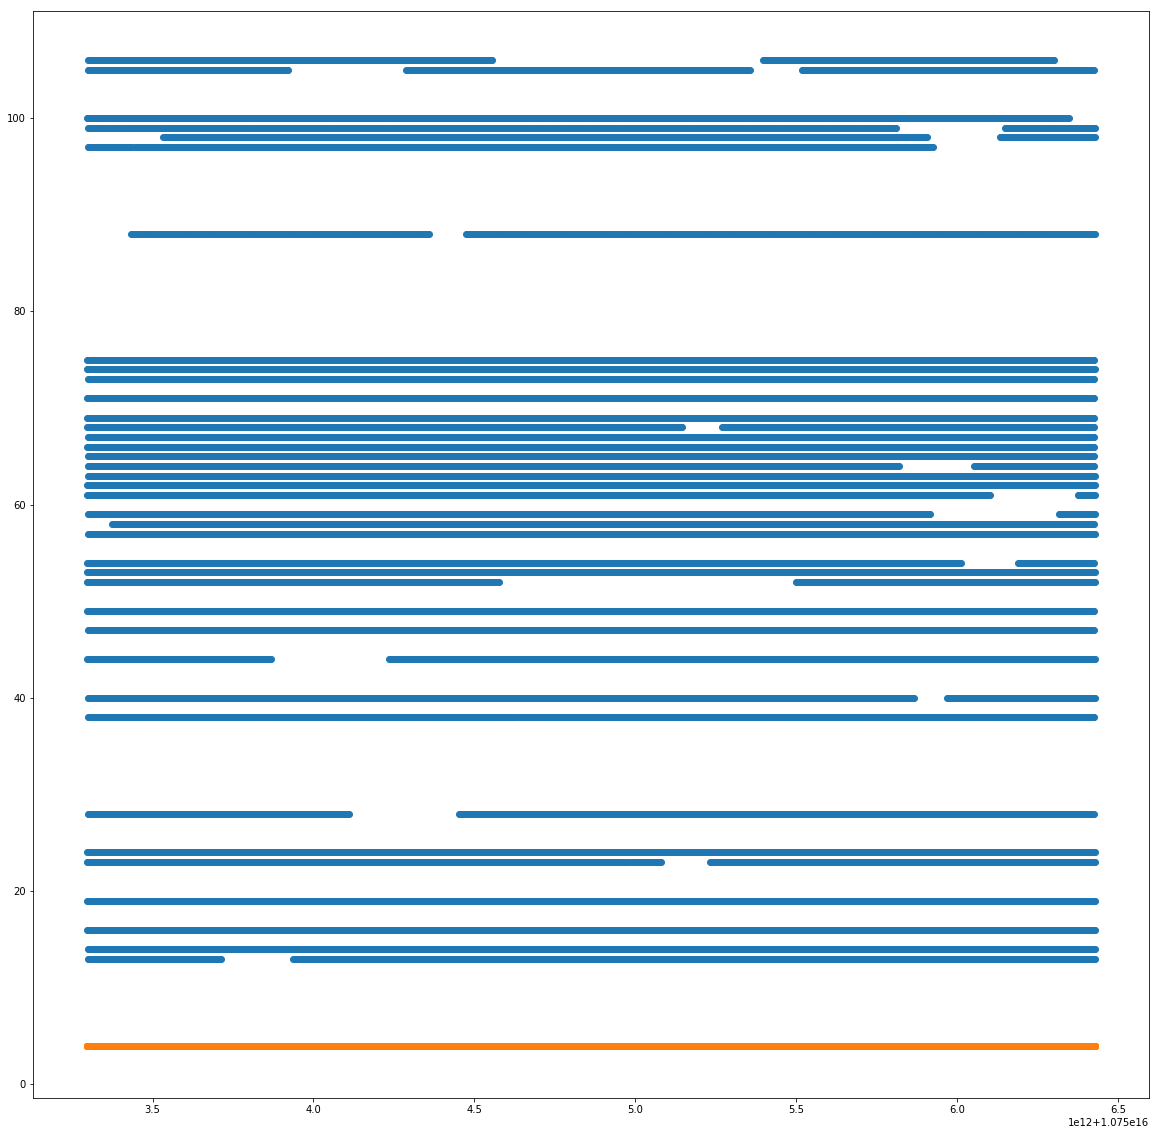

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
data1 = data[:int(len(data)/1000)]
balls = (4, 8, 10, 12)
referee = (105, 106)
ball=[el for el in data1 if el[0] in balls]
referee=[el for el in data1 if el[0] in referee]
players=[el for el in data1 if el[0] not in balls and el[0] not in referee]
yp=[el[0] for el in players]
xp=[el[1] for el  in players]
yb=[el[0] for el in ball]
xb=[el[1] for el in ball]

plt.figure(figsize=(20,20))
plt.scatter(xp,yp)
plt.scatter(xb,yb)

number of elements in a cycle: max = 38, min = 26


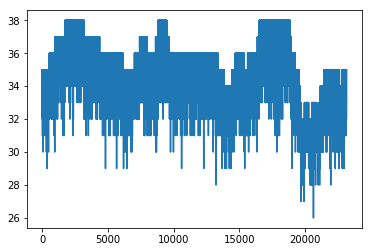

In [40]:
res=[]
p=set()
for i in range(len(players)-50):
    for sid, ts, x, y in players[i:]:
        if sid in p:
            res.append((len(p),players[i],[sid,ts]))
            p.clear()
            break
        else:
            p.add(sid)
plt.plot([el[0] for el in res])
print( 'number of elements in a cycle: max = {}, min = {}'.format(max([el[0] for el in res]),min([el[0] for el in res])))

In [41]:
print( 'cycle time: max = {} ms, min = {} ms'.format(max([(el[2][1] - el[1][1])/10**9 for el in res]),min([(el[2][1] - el[1][1])/10**9 for el in res])))

cycle time: max = 5.374592392 ms, min = 4.570954106 ms


In [42]:
res[0]

(34, [52, 10753295627242564, 23353, -15050], [52, 10753300448216920])

(35, [68, 10753364950387457, 26886, 7965], [97, 10753369813413209, 26356, -29482], [40, 10753369857628134, 22919, 11132])


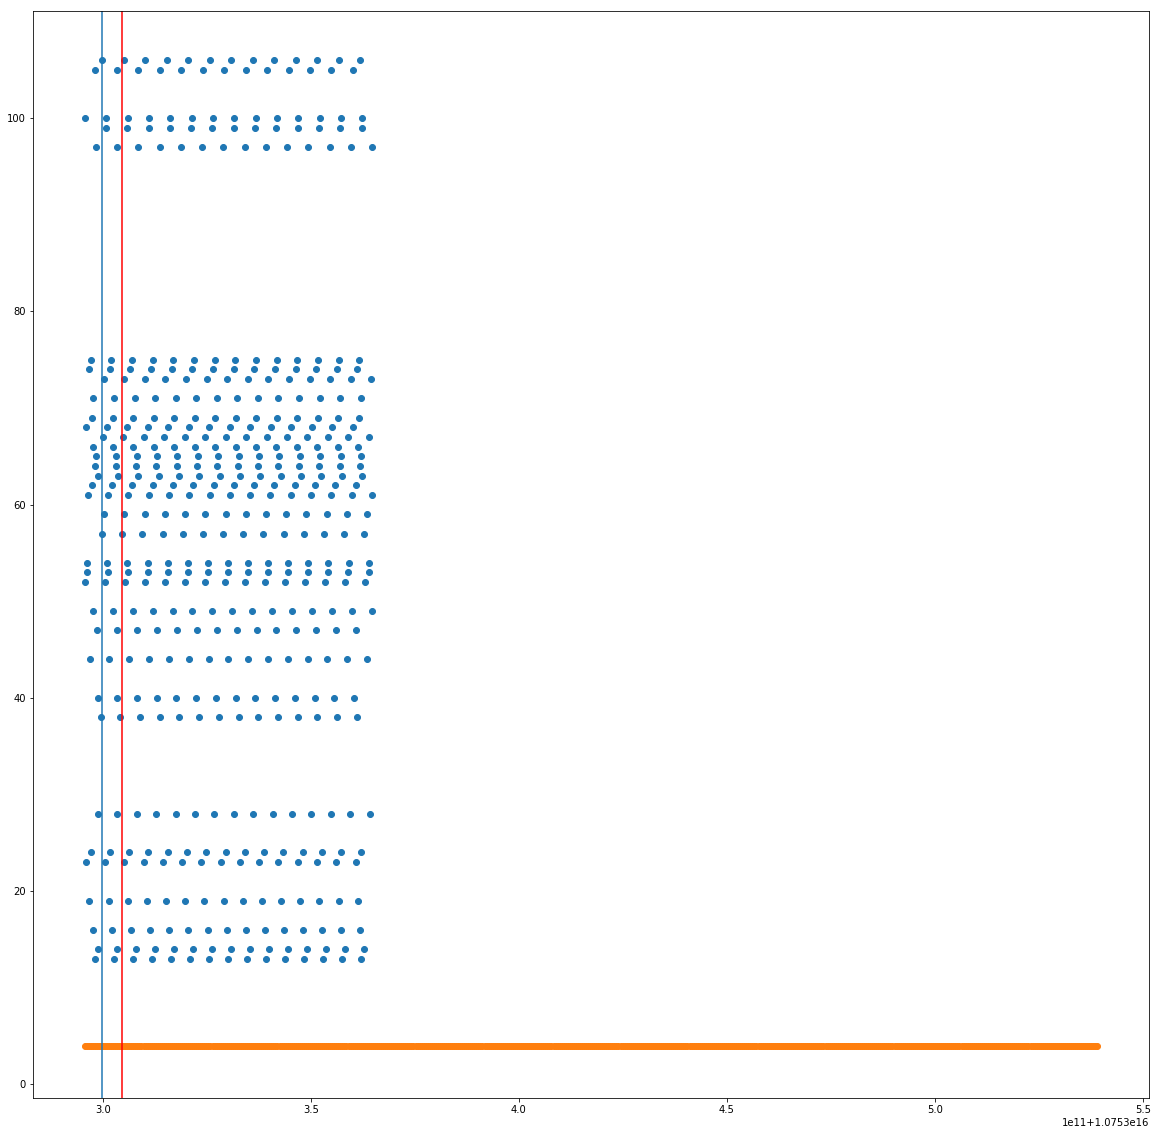

In [50]:
i = 500
plt.figure(figsize=(20,20))
plt.scatter(xp[:i],yp[:i])
plt.scatter(xb[:i],yb[:i])
j = 30
plt.axvline(x=res[j][2][1], color="red")
plt.axvline(x=res[j][1][1])
print(res[i])

    

In [44]:
p = set()
res=[]
for i in range(len(players)-50):
    for j in range(len(players[i:])):
        if players[j+i][0] in p:
            res.append((len(p),players[i],players[i+j-1],players[j+i]))
            p=set()
            break
        else:
            p.add(players[j+i][0])
print(res[0])
print( 'time between last sensor and new cycle: max = {} ms, min = {} ms'.format(max([(el[3][1] - el[2][1])/10**9 for el in res]),min([(el[3][1] - el[2][1])/10**9 for el in res])))

(34, [52, 10753295627242564, 23353, -15050], [59, 10753300286628772, 29523, -4469], [52, 10753300448216920, 23359, -15048])
time between last sensor and new cycle: max = 1.106778185 ms, min = 6.095e-06 ms


In [45]:
ball_delta = {}
for el in ball:
    if el[0] not in ball_delta.keys():
        ball_delta[el[0]]= [el[1], None]
    else:
        if ball_delta[el[0]][1] is None:
            ball_delta[el[0]]=[el[1],el[1]-ball_delta[el[0]][0]]
        else:
            delta=el[1]-ball_delta[el[0]][0]
            ball_delta[el[0]]=[el[1], delta if delta < ball_delta[el[0]][1] else ball_delta[el[0]][1]]
ball_delta

{4: [10756430306063572, 488043546]}